### 선형회귀

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data/Fish.csv')

In [29]:
cond = df['Species'] == 'Perch'

perch_length = df.loc[cond, ['Length2']]
perch_weight = df.loc[cond, ['Weight']]

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight)

In [32]:
test_input.head()

,Length2
93,22.7
100,25.6
103,27.5
96,24.0
105,27.5


In [33]:
# 선형회귀
from sklearn.linear_model import LinearRegression

In [34]:
lr = LinearRegression()

In [35]:
lr.fit(train_input, train_target)

LinearRegression()

In [36]:
lr.score(test_input, test_target)

0.9415198138743904

In [37]:
lr.predict([[60]])

C:\Users\2-22\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1545.17412481]])

In [38]:
# 기울기
a = lr.coef_[0][0]
# 37.76616202

In [39]:
# y절편
b = lr.intercept_[0]
# -670.47910704

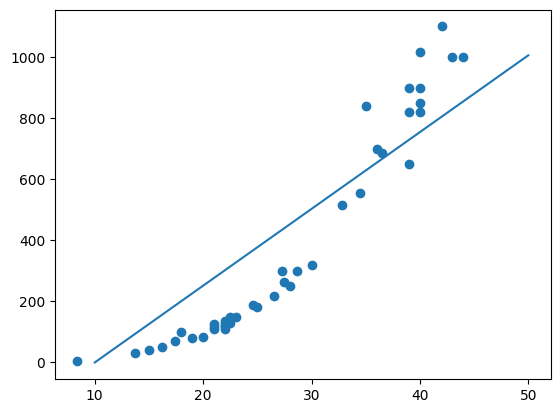

In [56]:
# 그래프로 확인
import matplotlib.pyplot as plt

plt.scatter(train_input['Length2'], train_target['Weight'])
plt.plot([10, 50], [0, 45*a+b])
plt.show()

In [42]:
# 다항회귀
perch_length.head()

,Length2
72,8.4
73,13.7
74,15.0
75,16.2
76,17.4


In [45]:
train_input['Length2_poly'] = train_input['Length2'] ** 2
test_input['Length2_poly'] = test_input['Length2'] **2
train_input.head()

,Length2,Length2_poly
117,39.0,1521.00
74,15.0,225.00
120,40.0,1600.00
72,8.4,70.56
82,21.0,441.00


In [46]:
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [47]:
lr.coef_

array([[-22.09046554,   1.01957346]])

In [48]:
lr.intercept_

array([126.59012923])

In [49]:
# 시각화
lr.predict([[60, 60**2]])

C:\Users\2-22\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[2471.62664047]])

In [50]:
lr.score(test_input, test_target)

0.9888203638857856

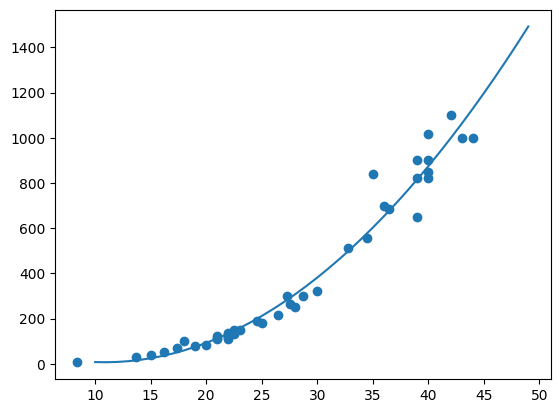

In [57]:
import matplotlib.pyplot as plt
import numpy as np
point = np.arange(10, 50)
plt.scatter(train_input['Length2'], train_target['Weight'])
plt.plot(point, 1.01957346*point**2 + -22.09046554*point + 126.59012923)
plt.show()